<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Classification with Python


Estimated time needed: **25** minutes
    

## Objectives

After completing this lab you will be able to:

* Confidently create classification models


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

%matplotlib inline




import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about the performance of basketball teams. The __cbb.csv__ data set includes performance data about five seasons of 354 basketball teams. It includes the following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|TEAM |	The Division I college basketball school|
|CONF|	The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)|
|G|	Number of games played|
|W|	Number of games won|
|ADJOE|	Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)|
|ADJDE|	Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)|
|BARTHAG|	Power Rating (Chance of beating an average Division I team)|
|EFG_O|	Effective Field Goal Percentage Shot|
|EFG_D|	Effective Field Goal Percentage Allowed|
|TOR|	Turnover Percentage Allowed (Turnover Rate)|
|TORD|	Turnover Percentage Committed (Steal Rate)|
|ORB|	Offensive Rebound Percentage|
|DRB|	Defensive Rebound Percentage|
|FTR|	Free Throw Rate (How often the given team shoots Free Throws)|
|FTRD|	Free Throw Rate Allowed|
|2P_O|	Two-Point Shooting Percentage|
|2P_D|	Two-Point Shooting Percentage Allowed|
|3P_O|	Three-Point Shooting Percentage|
|3P_D|	Three-Point Shooting Percentage Allowed|
|ADJ_T|	Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)|
|WAB|	Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)|
|POSTSEASON|	Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|
|SEED|	Seed in the NCAA March Madness Tournament|
|YEAR|	Season


### Load Data From CSV File  


Let's load the dataset [NB Need to provide link to csv file]


In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [92]:
df.shape

(1406, 24)

## Add Column
Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short. 


In [4]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Data visualization and pre-processing



Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.


In [5]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [7]:
df1['POSTSEASON'].value_counts()

POSTSEASON
S16    32
E8     16
F4      8
Name: count, dtype: int64

In [8]:
#WAB is Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)
# WAB ranges from -1.1 and 11.6.  With the decimals I suppose it may be the average wins above bubble in 5 seasons
df1['WAB'].value_counts().sort_index(ascending=False)

WAB
 11.6    1
 11.2    1
 11.0    1
 10.7    1
 10.0    1
 9.9     1
 9.2     1
 9.0     1
 8.8     1
 8.6     1
 8.2     1
 8.0     1
 7.9     2
 7.8     1
 7.6     2
 7.3     1
 7.0     1
 6.9     1
 6.7     1
 6.6     2
 6.4     2
 6.1     2
 6.0     1
 5.6     1
 5.5     1
 5.2     1
 5.1     1
 5.0     1
 4.9     1
 4.7     1
 4.6     1
 4.3     1
 4.2     1
 4.0     1
 3.9     1
 3.8     1
 3.6     1
 3.2     1
 2.5     2
 2.3     1
 2.1     1
 2.0     1
 1.9     1
 1.7     1
 1.6     1
 0.9     1
 0.4     1
-0.3     1
-0.4     1
-1.1     1
Name: count, dtype: int64

In [9]:
df1.BARTHAG.min(), df1.BARTHAG.max()

(0.8269, 0.9744)

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons. 


Lets plot some columns to underestand the data better:


In [8]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-RT23.1

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       h06a4308_0         130 KB  anaconda
    certifi-2023.7.22          |  py310h06a4308_0         155 KB  anaconda
    seaborn-0.12.2             |  py310h06a4308_0         494 KB  anaconda
    widgetsnbextension-4.0.5   |  py310h06a4308_0         1.6 MB  anaconda
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda 
  certifi                                         pkgs/main --> anaconda 
  seaborn                                         pkgs/main -

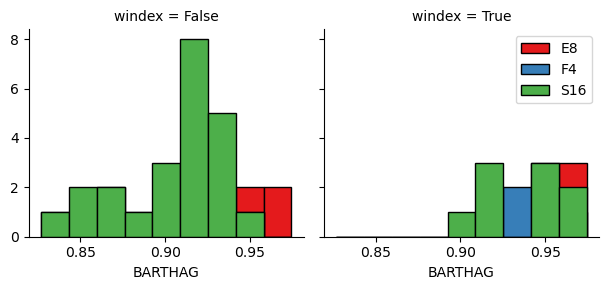

In [11]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

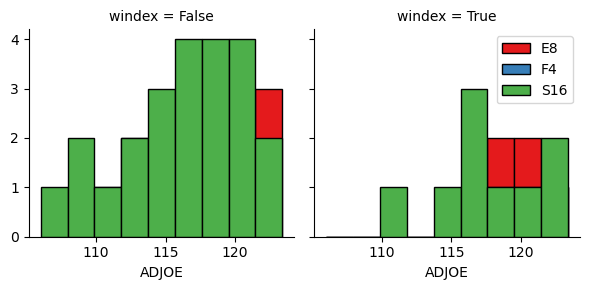

In [12]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at how Adjusted Defense Efficiency plots


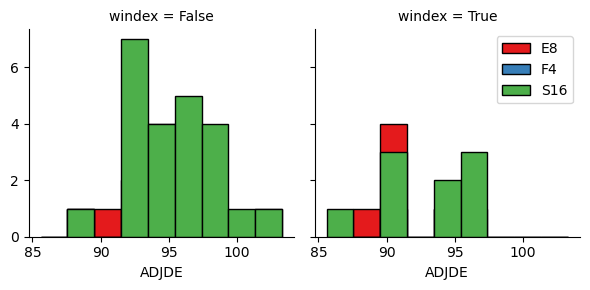

In [13]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that this data point doesn't impact the ability of a team to get into the Final Four. 


## Convert Categorical features to numerical values


Lets look at the postseason:


In [14]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: proportion, dtype: float64

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.


Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:


In [15]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


### Feature selection


Let's define feature sets, X:


In [16]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|


In [17]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

In [18]:
#y.aggregate()
#np.count_nonzero(y)
unique_values, counts = np.unique(y, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")

E8 occurs 16 times
F4 occurs 8 times
S16 occurs 32 times


## Normalize Data 


Data Standardization gives data zero mean and unit variance (technically should be done after train test split )


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

## Training and Validation 


Split the data into Training and Validation data.


In [20]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=4)#modified from test_size=0.2 to test_size=0.3 as 
#accuracy and precision for F4 was zero with all max_depth settings
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (39, 21) (39,)
Validation set: (17, 21) (17,)


# Classification 


Now, it is your turn, use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



# K Nearest Neighbor(KNN)

<b>Question  1 </b> Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)


You can use <code> accuracy_score</cdoe>


In [21]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [22]:
#Question 1 Answer
neigh = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
yhat=neigh.predict(X_val)
mean_acc = metrics.accuracy_score(y_val, yhat)
print('acuracy = ',mean_acc)

acuracy =  0.5882352941176471


<b>Question  2</b> Determine and print the accuracy for the first 15 values of k on the validation data:


In [23]:
#Qn 2 Answer
Ks = 16

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_val)
    mean_acc = metrics.accuracy_score(y_val, yhat)
    print('Accuracy with K: ',n,'= ',mean_acc)

Accuracy with K:  1 =  0.29411764705882354
Accuracy with K:  2 =  0.29411764705882354
Accuracy with K:  3 =  0.5294117647058824
Accuracy with K:  4 =  0.47058823529411764
Accuracy with K:  5 =  0.5882352941176471
Accuracy with K:  6 =  0.5882352941176471
Accuracy with K:  7 =  0.6470588235294118
Accuracy with K:  8 =  0.5882352941176471
Accuracy with K:  9 =  0.5882352941176471
Accuracy with K:  10 =  0.6470588235294118
Accuracy with K:  11 =  0.5882352941176471
Accuracy with K:  12 =  0.5882352941176471
Accuracy with K:  13 =  0.5294117647058824
Accuracy with K:  14 =  0.47058823529411764
Accuracy with K:  15 =  0.5882352941176471


# Decision Tree


The following lines of code fit a <code>DecisionTreeClassifier</code>:


In [25]:
from sklearn.tree import DecisionTreeClassifier

# Question 3 - Answer
#from the results it seems acuracy score was going up and down
#Coaches are more interested in finding which team metrics more likely to make it into the final 4 (F4).
#I noticed that with q test split to 0.2 (20%) F4 precision and recall were mostly zero
#so I increased the parameter to 0.3 couple of cells above
##Precision for F4 measures what percentage of F4 predictions are accurate.  I think this is most important as the coaches will be making investments based on this
#Recall for F4 measures what perc of actual F4 values are predicted as F4.  

Recall is next most important metric as it calculates percentage of actual instances of F4 that were predicted as F4. If this is less accurate we may be missing some good information

#From the 15 runs with max_depth from 1 to 15 below, 11 seems to be the min max_depth that improves results

metrics for F4 when max_depth is:  11 accuracy =  0.47058823529411764 precision =  1.0 recall =  0.5 f1score =  0.6666666666666666
 
 It changes if you rerun the train, test split again.  
 
Charts below also shows the same

<b>Question  3</b> Determine the minumum   value for the parameter <code>max_depth</code> that improves results 


In [26]:
Ks = 16
mettype=['precision','recall','f1-score','support']
mean_acc = np.zeros((Ks-1))
dprec = np.zeros((Ks-1))
drecal = np.zeros((Ks-1))
df1score = np.zeros((Ks-1))
mdepth = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=dtree.predict(X_val)
    mean_acc[n-1] = metrics.accuracy_score(y_val, yhat)
#     dprec[n-1] = metrics.precision_score(y_val, yhat) # results in div by zero error
#     drecal[n-1] = metrics.recall_score(y_val, yhat)
#     df1score[n-1] = metrics.f1_score(y_val, yhat)
    prfs=metrics.precision_recall_fscore_support(y_val, yhat)
    dprec[n-1] = prfs[0][1]#F4 metrics determined by comparing with metrics.classification_report(y_val, yhat)
    drecal[n-1] = prfs[1][1]
    df1score[n-1] = prfs[2][1]
    mdepth[n-1]= n

    
    
    print('metrics for F4 when max_depth is: ',n,'accuracy = ',mean_acc[n-1],'precision = ',dprec[n-1],'recall = ',drecal[n-1],'f1score = ',df1score[n-1])

print("DecisionTrees's Accuracy Report for max_depth: ", Ks, metrics.classification_report(y_val, yhat))

metrics for F4 when max_depth is:  1 accuracy =  0.4117647058823529 precision =  0.0 recall =  0.0 f1score =  0.0
metrics for F4 when max_depth is:  2 accuracy =  0.35294117647058826 precision =  0.0 recall =  0.0 f1score =  0.0
metrics for F4 when max_depth is:  3 accuracy =  0.29411764705882354 precision =  0.2 recall =  0.5 f1score =  0.28571428571428575
metrics for F4 when max_depth is:  4 accuracy =  0.35294117647058826 precision =  0.3333333333333333 recall =  0.5 f1score =  0.4
metrics for F4 when max_depth is:  5 accuracy =  0.35294117647058826 precision =  0.5 recall =  0.5 f1score =  0.5
metrics for F4 when max_depth is:  6 accuracy =  0.29411764705882354 precision =  0.3333333333333333 recall =  0.5 f1score =  0.4
metrics for F4 when max_depth is:  7 accuracy =  0.23529411764705882 precision =  0.25 recall =  0.5 f1score =  0.3333333333333333
metrics for F4 when max_depth is:  8 accuracy =  0.35294117647058826 precision =  0.3333333333333333 recall =  0.5 f1score =  0.4
metr

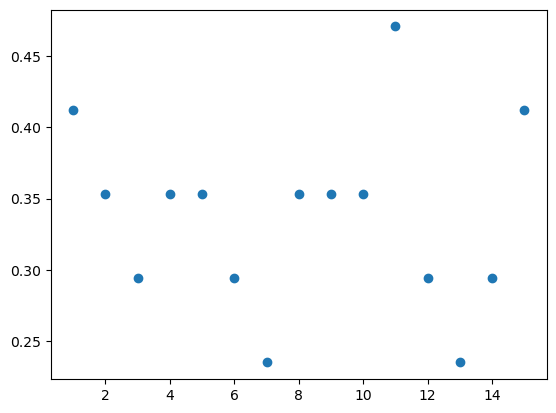

In [27]:
from matplotlib import pyplot as plt 
%matplotlib inline
# print('metrics for F4 when max_depth is: ',n,'accuracy = ',mean_acc[n-1],'precision = ',dprec[n-1],'recall = ',drecal[n-1],'f1score = ',df1score[n-1])

y=mean_acc
x=mdepth
plt.scatter(x, y, marker='o') 

#tried plotting the values but 

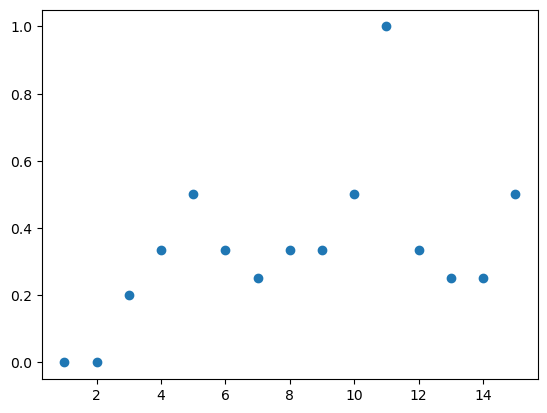

In [28]:
y=dprec
x=mdepth
plt.scatter(x, y, marker='o') 
# list(zip(x,y))

# Support Vector Machine


<b>Question  4</b> Train the support  vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.


#Tried all 4 Kernals below.  Best score was provided by linear kernal. 
As Coaches are more interested in finding which team metrics more likely to make it into the final 4 (F4), We have to consider precision and recall,
which were 0 for other 3 methods 

In [29]:
from sklearn import svm
# from sklearn.preprocessing import normalize, StandardScaler
# from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [30]:
#converted y values to 1 when 'F4', what the coaches are interested in predicting and 0 otherwise
y_t = np.where(y_train == 'F4', 1, 0)
y_v = np.where(y_val == 'F4', 1, 0)
y_t.shape,y_v.shape

((39,), (17,))

In [32]:
#Linear Kernal
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_t) 
yhat = clf.predict(X_val)

In [33]:
#Defining a function for confusion metrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.33      0.50      0.40         2

    accuracy                           0.82        17
   macro avg       0.63      0.68      0.65        17
weighted avg       0.86      0.82      0.84        17

Confusion matrix, without normalization
[[ 1  1]
 [ 2 13]]


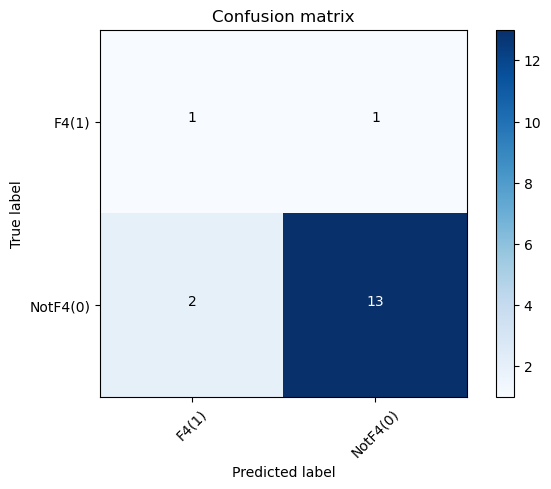

In [120]:
# Compute confusion matrix  Linear Kernal
cnf_matrix = confusion_matrix(y_v, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_v, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['F4(1)','NotF4(0)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.00      0.00      0.00         2

    accuracy                           0.88        17
   macro avg       0.44      0.50      0.47        17
weighted avg       0.78      0.88      0.83        17

Confusion matrix, without normalization
[[ 0  2]
 [ 0 15]]


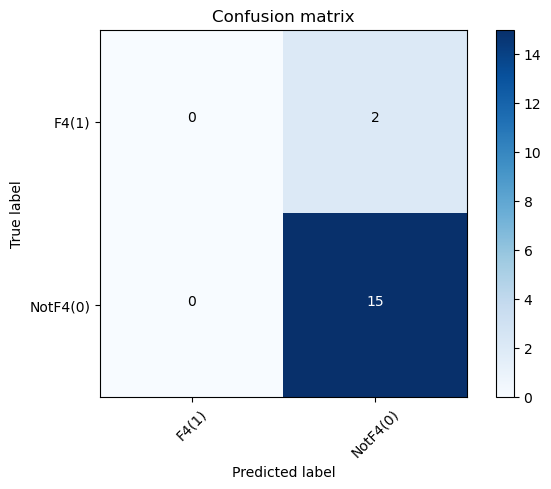

In [34]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_t) 
yhat = clf.predict(X_val)

# Compute confusion matrix  Poly Kernal
cnf_matrix = confusion_matrix(y_v, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_v, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['F4(1)','NotF4(0)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.00      0.00      0.00         2

    accuracy                           0.88        17
   macro avg       0.44      0.50      0.47        17
weighted avg       0.78      0.88      0.83        17

Confusion matrix, without normalization
[[ 0  2]
 [ 0 15]]


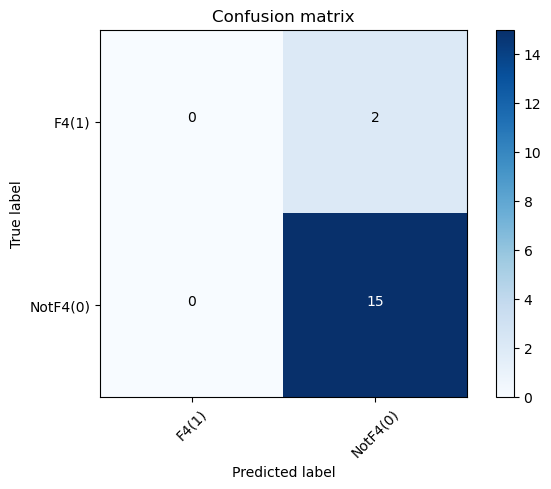

In [35]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_t) 
yhat = clf.predict(X_val)

# Compute confusion matrix for rbf Kernal
cnf_matrix = confusion_matrix(y_v, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_v, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['F4(1)','NotF4(0)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.00      0.00      0.00         2

    accuracy                           0.88        17
   macro avg       0.44      0.50      0.47        17
weighted avg       0.78      0.88      0.83        17

Confusion matrix, without normalization
[[ 0  2]
 [ 0 15]]


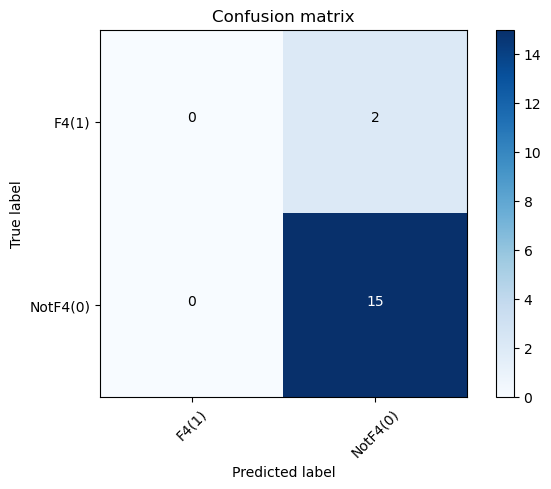

In [36]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_t) 
yhat = clf.predict(X_val)

# Compute confusion matrix for sigmoid Kernal
cnf_matrix = confusion_matrix(y_v, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_v, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['F4(1)','NotF4(0)'],normalize= False,  title='Confusion matrix')

# Logistic Regression


<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)


###### Question 5 - Answers
Model is trained below and accuracy is reported.  Tried both liblinear and sag solvers.

classification report is created that gives precision, recall, f1score and average accuracy
For the case of teams making it into the final 4 (F4),values are reported below

y       Precision Recall.   f1-score

1       0.50           1.00      0.67

1       0.50           1.00      0.67       

Logloss value is 0.65 for liblinear solver vs 0.35 for sag. Hence Sag solver is recommended for further use

In [37]:
from sklearn.linear_model import LogisticRegression
#help(LogisticRegression)
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_t)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [38]:
yhat.shape,X_val.shape,y_v.shape,y_t.shape

((17,), (17, 21), (17,), (39,))

In [39]:
yhat = LR.predict(X_val)
yhat
yhat_prob = LR.predict_proba(X_val)
#yhat_yhat_prob=list(zip(yhat,yhat_prob))
#print(yhat_yhat_prob)


from sklearn.metrics import log_loss
print(log_loss(y_v, yhat_prob))

0.6538165516065755


              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.50      1.00      0.67         2

    accuracy                           0.88        17
   macro avg       0.75      0.93      0.80        17
weighted avg       0.94      0.88      0.90        17

Confusion matrix, without normalization
[[ 2  0]
 [ 2 13]]


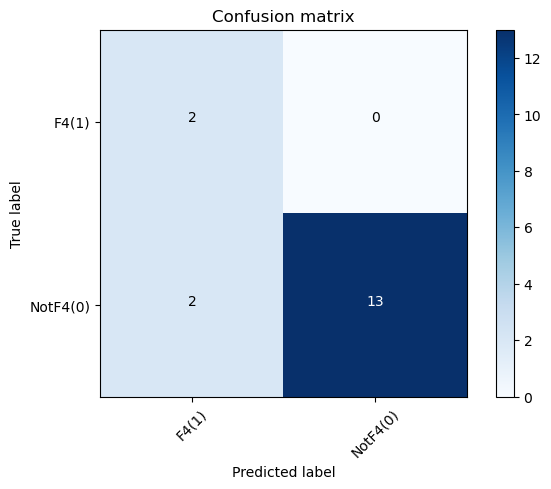

In [127]:
# Compute confusion matrix for Liblinear Logistics model
cnf_matrix = confusion_matrix(y_v, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_v, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['F4(1)','NotF4(0)'],normalize= False,  title='Confusion matrix')

In [41]:
print (classification_report(y_v, yhat))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.50      1.00      0.67         2

    accuracy                           0.88        17
   macro avg       0.75      0.93      0.80        17
weighted avg       0.94      0.88      0.90        17



In [42]:
# write your code here

# LR = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
# LR
#help(LogisticRegression)

LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_t)
yhat_prob2 = LR2.predict_proba(X_val)
print ("LogLoss: : %.2f" % log_loss(y_v, yhat_prob2))
print (classification_report(y_v, yhat))

LogLoss: : 0.35
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.50      1.00      0.67         2

    accuracy                           0.88        17
   macro avg       0.75      0.93      0.80        17
weighted avg       0.94      0.88      0.90        17



# Model Evaluation using Test set


In [43]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [44]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Question  5</b> Calculate the  F1 score and Jaccard score for each model from above. Use the Hyperparameter that performed best on the validation data. **For f1_score please set the average parameter to 'micro'.**


### Load Test set for evaluation 


In [45]:
# test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv')
test_df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [46]:
test_df.shape

(1757, 24)

In [48]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

array([[-4.08e-01, -1.10e+00,  3.37e-01,  2.66e+00, -2.47e+00,  2.14e-01,
         9.44e-01, -1.19e+00, -1.64e+00,  1.45e-02,  1.30e+00, -6.24e-01,
        -9.32e-01,  1.43e-01,  1.69e-01,  2.85e-01,  1.63e+00, -8.37e-01,
        -9.99e-01,  4.84e-01, -6.77e-01],
       [ 3.64e-01,  3.26e-01,  7.03e-01, -7.14e-01,  1.07e+00,  4.83e-01,
         4.77e-01, -1.33e+00, -6.86e-02, -7.35e-01, -1.35e+00, -8.07e-01,
         3.42e-01,  4.97e-02,  9.41e-02,  1.37e+00,  6.94e-01, -2.01e+00,
         9.81e-01, -1.19e+00,  1.48e+00],
       [ 3.64e-01,  1.18e+00,  9.32e-01, -8.79e-01,  1.24e+00,  7.85e-01,
        -9.22e-01,  5.28e-01, -1.87e-01, -1.19e-01, -3.18e-01,  6.82e-01,
         1.01e+00,  8.07e-02, -9.91e-01,  1.75e+00, -2.39e-01,  6.61e-01,
         1.92e+00, -1.19e+00,  1.48e+00],
       [ 3.64e-01,  6.12e-01,  3.60e-01,  7.15e-01, -8.92e-02, -3.58e-01,
         6.90e-01, -6.42e-01,  4.83e-01,  3.90e-01,  6.81e-01,  1.07e+00,
         1.01e-01,  4.97e-02,  1.92e-02, -8.41e-01,  1.33e+0

In [49]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]
# y_v = np.where(test_y == 'F4', 1, 0)
test_yb = np.where(test_y == 'F4', 1, 0)
test_y[0:5],test_yb[0:5]

(array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object), array([0, 0, 0, 0, 1]))

In [50]:
test_y.shape,test_X.shape,test_yb.shape

((70,), (70, 21), (70,))

In [51]:
Report_data = pd.DataFrame(columns=['Algorithm','Accuracy','Jaccard','F1-score','LogLoss'])

KNN


In [52]:
neigh = KNeighborsClassifier(n_neighbors = 10).fit(X_train,y_train) #training with the final parameters
yhat=neigh.predict(test_X)
mean_acc = metrics.accuracy_score(test_y, yhat)

f1score=metrics.f1_score(test_y, yhat,average='micro')
jaccard=jaccard_index(yhat, test_y)
LogLoss='NA'
Report_data = Report_data._append({"Algorithm":'KNN', "Accuracy":mean_acc,"Jaccard":jaccard, "F1-score":f1score,"LogLoss":LogLoss}, ignore_index=True)
Report_data

,Algorithm,Accuracy,Jaccard,F1-score,LogLoss
0,KNN,0.557143,0.386139,0.557143,NA


Decision Tree


In [53]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 11).fit(test_X,test_y)
yhat=dtree.predict(test_X)
mean_acc = metrics.accuracy_score(test_y, yhat)
f1score=metrics.f1_score(test_y, yhat,average='micro')
jaccard=jaccard_index(yhat, test_y)
LogLoss='NA'
Report_data = Report_data._append({"Algorithm":'Decision Tree', "Accuracy":mean_acc,"Jaccard":jaccard, "F1-score":f1score,"LogLoss":LogLoss}, ignore_index=True)
Report_data

,Algorithm,Accuracy,Jaccard,F1-score,LogLoss
0,KNN,0.557143,0.386139,0.557143,NA
1,Decision Tree,1.000000,1.000000,1.000000,NA


SVM


In [54]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_t) #y_t is y_train transformed earlier to binary as above
yhat = clf.predict(test_X)

mean_acc = metrics.accuracy_score(test_yb, yhat)
f1score=metrics.f1_score(test_yb, yhat,average='micro')
jaccard=jaccard_index(yhat, test_yb)
LogLoss='NA'
Report_data = Report_data._append({"Algorithm":'SVM', "Accuracy":mean_acc,"Jaccard":jaccard, "F1-score":f1score,"LogLoss":LogLoss}, ignore_index=True)
Report_data

,Algorithm,Accuracy,Jaccard,F1-score,LogLoss
0,KNN,0.557143,0.386139,0.557143,NA
1,Decision Tree,1.000000,1.000000,1.000000,NA
2,SVM,0.928571,0.866667,0.928571,NA


Logistic Regression


In [58]:
#solver = sag gave a much better logloss value
LR = LogisticRegression(C=0.01, solver='sag').fit(X_train, y_t)
yhat = LR.predict(test_X)

yhat_prob = LR.predict_proba(test_X)
#yhat_yhat_prob=list(zip(yhat,yhat_prob))

mean_acc = metrics.accuracy_score(test_yb, yhat)
f1score=metrics.f1_score(test_yb, yhat,average='micro')
jaccard=jaccard_index(yhat, test_yb)
LogLoss=log_loss(test_yb, yhat_prob)

Report_data = Report_data._append({"Algorithm":'LogisticRegression', "Accuracy":mean_acc,"Jaccard":jaccard, "F1-score":f1score,"LogLoss":LogLoss}, ignore_index=True)
Report_data

,Algorithm,Accuracy,Jaccard,F1-score,LogLoss
0,KNN,0.557143,0.386139,0.557143,NA
1,Decision Tree,1.000000,1.000000,1.000000,NA
2,SVM,0.928571,0.866667,0.928571,NA
3,LogisticRegression,0.857143,0.750000,0.857143,0.387841


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Accuracy | Jaccard  | F1-score  | LogLoss |
|--------------------|----------|----------|-----------|---------|
| KNN                |     ?    |     ?    |     ?     | NA      |
| Decision Tree      |     ?    |     ?    |     ?     | NA      |
| SVM                |     ?    |     ?    |     ?     | NA      |
| LogisticRegression |     ?    |     ?    |     ?     |     ?   |


Something to keep in mind when creating models to predict the results of basketball tournaments or sports in general is that is quite hard due to so many factors influencing the game. Even in sports betting an accuracy of 55% and over is considered good as it indicates profits.


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Watson Studio</a>



### Thank you for completing this lab!


## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Joseph Santarcangelo</a>




## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
|2021-04-03   | 2.1  | Malika Singla| Updated the Report accuracy |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
